# PyTesseract quickstart
This notebook is simply an annoted version of the quickstart guide on the [pytesseract page on PyPi](https://pypi.org/project/pytesseract/).

In [1]:
from PIL import Image
from IPython.display import display
import pytesseract

In [2]:
# If you don't have tesseract executable in your PATH, include the following:
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\jamesl\AppData\Local\Tesseract-OCR\tesseract.exe'

## 1. Image to string

In [3]:
def show_im(image, display_width=500):
    w, h = image.size
    
    display_height = int((display_width/w)*h)
    display(image.resize((display_width, display_height)))

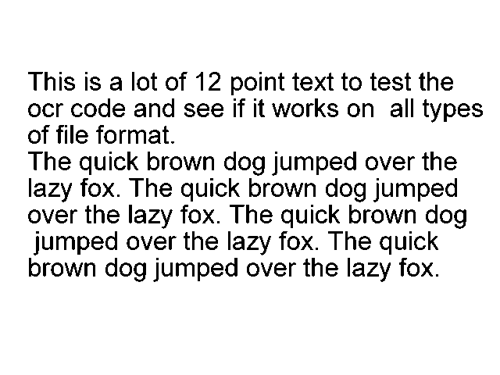

In [4]:
path = 'images/test.png'

im = Image.open(path)
show_im(im, 500)

In [5]:
print(pytesseract.image_to_string(im))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


In order to bypass the image conversions of pytesseract, just use relative or absolute image path
> NOTE: In this case you should provide tesseract supported images or tesseract will return error

In [6]:
print(pytesseract.image_to_string(im))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.


## 2. Batch processing
Use a single text file containing the list of multiple image file paths

In [7]:
print(pytesseract.image_to_string('images/images.txt'))

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox.

serchote1

Grosse Scheidegy
wt

Fuatte tilien

feos. ae
m Tow

Icone a t

mile a
a
a

or am
oo se
co an
or wa

Mneinaebtel

a
i

Toul : on - 54.50
bel. neenee sumon | as

Barat nbro  %8 ar
Eo sete Si: oute

ha nc an ane
teus om ss aris
acs om ase ar io

Eaalls euistsaelanatluein ch


## 3. Timeout/terminate the tesseract job after a period of time

In [8]:
try:
    print('Trying for 3 seconds...\n')
    print(pytesseract.image_to_string(im, timeout=3), '\n')
    print('Trying for 0.5 seconds...\n')
    print(pytesseract.image_to_string(im, timeout=.5), '\n')
except RuntimeError as timeout_error:
    # Tesseract processing is terminated
    print('Timed out before completing job :(')
    pass

Trying for 3 seconds...

This is a lot of 12 point text to test the
ocr code and see if it works on all types
of file format.

The quick brown dog jumped over the
lazy fox. The quick brown dog jumped
over the lazy fox. The quick brown dog
jumped over the lazy fox. The quick
brown dog jumped over the lazy fox. 

Trying for 0.5 seconds...

Timed out before completing job :(


In [9]:
# Get bounding box estimates
print(pytesseract.image_to_boxes(im)[:72])

T 36 364 50 388 0
h 50 364 55 388 0
i 62 364 71 388 0
s 76 364 95 388 0



In [10]:
# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(im)[:550])

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	640	480	-1	
2	1	1	0	0	0	36	92	582	269	-1	
3	1	1	1	0	0	36	92	582	92	-1	
4	1	1	1	1	0	36	92	544	30	-1	
5	1	1	1	1	1	36	92	60	24	96	This
5	1	1	1	1	2	109	92	20	24	96	is
5	1	1	1	1	3	141	98	15	18	96	a
5	1	1	1	1	4	169	92	32	24	95	lot
5	1	1	1	1	5	212	92	28	24	96	of
5	1	1	1	1	6	251	92	31	24	96	12
5	1	1	1	1	7	296	92	68	30	95	point
5	1	1	1	1	8	374	93	53	23	96	text
5	1	1	1	1	9	437	93	26	23	96	to
5	1	1	1	1	10	474	93	52	23	96	test
5	1	1	1	1	11	536	92	44	24	96	the


In [11]:
# Get information about orientation and script detection
print(pytesseract.image_to_osd(im))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 10.86
Script: Latin
Script confidence: 10.56


## 4. Saving as PDF or HOCR file

In [12]:
# Get a searchable PDF
pdf = pytesseract.image_to_pdf_or_hocr(path, extension='pdf')
with open('test.pdf', 'w+b') as f:
    f.write(pdf)  # pdf type is bytes by default

See [this thread](https://stackoverflow.com/questions/38361243/hocr-to-html-for-visualizing) outlining options for visualising HOCR files.

After saving the file below, add the following line just before the closing tag:
```html
<script src="https://unpkg.com/hocrjs"></script>
```

In [13]:
# Get HOCR output
hocr = pytesseract.image_to_pdf_or_hocr(path, extension='hocr')
with open('test.html', 'w+b') as f:
    f.write(hocr)

In [14]:
from IPython.display import IFrame

# def embed_map(m, width='100%', height='750px', filepath='maps/', filename='map.html'):

#     m.save(filepath+filename)

IFrame('test.html', width='100%', height='500px')

## 5. OpenCV

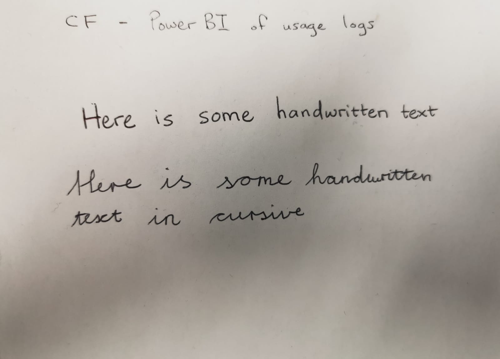

In [28]:
path = 'images/handwriting.jpg'

im = Image.open(path)
show_im(im, 500)

In [29]:
print(pytesseract.image_to_string(im))

In [31]:
# Get verbose data including boxes, confidences, line and page numbers
print(pytesseract.image_to_data(im))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1600	1150	-1	
2	1	1	0	0	0	0	0	1600	1150	-1	
3	1	1	1	0	0	0	0	1600	1150	-1	
4	1	1	1	1	0	0	0	1600	1150	-1	
5	1	1	1	1	1	0	0	1600	1150	95
